# DPD DF

In [1]:
# General Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

In [2]:
dpd_Sept_Jan = pd.read_csv("dpd_Sept_Jan.csv")

In [3]:
dpd_Sept_Jan['description']

0               TIBURON HISTORICAL DATA
1               TIBURON HISTORICAL DATA
2               TIBURON HISTORICAL DATA
3               TIBURON HISTORICAL DATA
4               TIBURON HISTORICAL DATA
                       ...             
1859123                    TRAFFIC STOP
1859124                    BUS BOARDING
1859125      START OF SHIFT INFORMATION
1859126                  DV A/B I/P-J/H
1859127    PROPERTY DAMAGE NON-CRIMINAL
Name: description, Length: 1859128, dtype: object

In [4]:
dpd_Sept_Jan["callCode"].value_counts()

callCode
181    319455
3      286240
88     130041
22     110233
90     100204
        ...  
353         1
124         1
204         1
209         1
369         1
Name: count, Length: 348, dtype: int64

In [5]:
dpd_Sept_Jan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1859128 entries, 0 to 1859127
Data columns (total 10 columns):
 #   Column             Dtype  
---  ------             -----  
 0   incidentId         int64  
 1   callCode           int64  
 2   description        object 
 3   Date of Incident   object 
 4   Time of Incident   object 
 5   totalResponseTime  float64
 6   address            object 
 7   zip                float64
 8   longitude          float64
 9   latitude           float64
dtypes: float64(4), int64(2), object(4)
memory usage: 141.8+ MB


In [6]:
grouped_crime = dpd_Sept_Jan.groupby(["callCode","description"], as_index = False) \
                            .agg({"incidentId":"count", "totalResponseTime":"mean"})
grouped_crime.rename(columns = {"incidentId":"CountOfIncidents"}, inplace = True)
grouped_crime.sort_values(by = ["CountOfIncidents"], ascending = False, inplace=True)

In [7]:
grouped_crime_date = dpd_Sept_Jan.groupby(["Date of Incident","callCode","description"], as_index = False) \
                                 .agg({"incidentId":"count", "totalResponseTime":"mean"})
grouped_crime_date.rename(columns = {"incidentId":"CountOfIncidents"}, inplace = True)
grouped_crime_date.sort_values(by = ["CountOfIncidents"], ascending = False, inplace=True)

In [8]:
fulldpd = dpd_Sept_Jan[["Date of Incident", "Time of Incident", "zip", "latitude", "longitude","description", "totalResponseTime"]]

In [9]:
# #mapping different crime code descriptions and adding them to a dictionary
crime_mapping = {'Robbery': 'robbery', 
                'Traffic Stop': 'traffic',
                'Towing': 'towing',
                'Assault': 'assault',
                'Larceny': 'larceny',
                'Shots Fired': ['shots', 'fired'],
                'Malicious Destruction': ['malicious', 'destruction'],
                'Drugs': 'drug',
                'Auto Injury': ['auto', 'injur'],
                'Weapon': ['weapon', 'person'],
                'Breaking & Entering': ['breaking', 'entering'],
                'Disturbance': 'disturbance',
                'Burglary' : 'burglary'
}
for crime in crime_mapping.keys():
    desc_list = []
    for desc in grouped_crime["description"]:
        try:
            if crime_mapping[crime] in desc.lower():
                desc_list.append(desc) 
        except:
            if (crime_mapping[crime][0] in desc.lower()) and (
                crime_mapping[crime][1] in desc.lower()):
                desc_list.append(desc) 
    crime_mapping[crime] = desc_list 

In [10]:
for key in crime_mapping.keys():
    grouped_crime["description"].replace(crime_mapping[key], key, inplace=True)
    grouped_crime_date["description"].replace(crime_mapping[key], key, inplace=True)
    fulldpd["description"].replace(crime_mapping[key], key, inplace=True)
    

/tmp/ipykernel_332/421408326.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fulldpd["description"].replace(crime_mapping[key], key, inplace=True)


In [11]:
crime_mapping.keys()

dict_keys(['Robbery', 'Traffic Stop', 'Towing', 'Assault', 'Larceny', 'Shots Fired', 'Malicious Destruction', 'Drugs', 'Auto Injury', 'Weapon', 'Breaking & Entering', 'Disturbance', 'Burglary'])

In [12]:
grouped_crimes = grouped_crime.groupby(["description"], as_index=False) \
                              .agg({"CountOfIncidents":"sum","totalResponseTime":"mean"})
grouped_crimes.sort_values(by= "CountOfIncidents", ascending=False, inplace=True)
# grouped_crimes = grouped_crimes.head(20)

grouped_crimes_date = grouped_crime_date.groupby(["Date of Incident","description"], as_index=False)\
                    .agg({"CountOfIncidents":"sum", "totalResponseTime":"mean"})

grouped_crimes = grouped_crimes[grouped_crimes["description"] \
                                .isin(crime_mapping.keys())]

grouped_crimes_date = grouped_crimes_date[grouped_crimes_date["description"] \
                        .isin(crime_mapping.keys())]
    
fulldpd = fulldpd[fulldpd["description"] \
                        .isin(crime_mapping.keys())]   
                        
grouped_crimes_date.sort_values(by="Date of Incident", inplace=True)
grouped_crimes_date

,Date of Incident,description,CountOfIncidents,totalResponseTime
1,2016-09-01,Traffic Stop,118,0.000000
5,2016-09-02,Traffic Stop,131,0.000000
7,2016-09-03,Traffic Stop,87,0.000000
11,2016-09-04,Traffic Stop,83,0.000000
14,2016-09-05,Traffic Stop,76,0.000000
...,...,...,...,...
80840,2023-01-30,Auto Injury,18,13.479167
80839,2023-01-30,Assault,71,16.030357
80908,2023-01-30,Traffic Stop,295,35.708333
80854,2023-01-30,Drugs,10,18.033333


In [13]:
# grouped_crimes_date["Date of Incident"] = pd.to_datetime(grouped_crimes_date["Date of Incident"])


# grouped_crimes_date["Season"] = grouped_crimes_date["Date of Incident"].apply(
#     lambda x: x.year if 9 <= x.month <= 12 else x.year - 1 if x.month == 1 else None)

In [14]:
grouped_crimes_date = grouped_crimes_date[["Date of Incident","description","CountOfIncidents","totalResponseTime"]]
grouped_crimes_date.tail(20)

,Date of Incident,description,CountOfIncidents,totalResponseTime
80754,2023-01-29,Burglary,31,25.925000
80765,2023-01-29,Drugs,10,13.388889
80764,2023-01-29,Disturbance,126,28.968576
80753,2023-01-29,Breaking & Entering,7,12.187500
80749,2023-01-29,Auto Injury,12,19.945000
80748,2023-01-29,Assault,66,11.692107
80780,2023-01-29,Larceny,36,10.320556
80907,2023-01-30,Towing,49,0.000000
80905,2023-01-30,Shots Fired,17,7.650000
80894,2023-01-30,Robbery,3,9.700000


In [15]:
# byDesc_avg = grouped_crimes_date.groupby(["description"], as_index=False).agg({"CountOfIncidents" : "mean"})
# byDesc_avg["AvgPercentage"] = byDesc_avg["CountOfIncidents"] / byDesc_avg["CountOfIncidents"].sum()
# byDesc_avg["AvgPercentage"].round(2)
# byDesc_avg

In [16]:
# bySeason_avg = grouped_crimes_date.groupby(["Season", "description"], as_index=False).agg({"CountOfIncidents" : "mean"})
# bySeason_avg #[bySeason_avg["Season"] == 2022]

In [ ]:
# byZipcode

In [18]:
nfl_lions2022 = pd.read_csv("2022_nfl_lions.csv")

In [19]:
nfl_lions2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Home or Away        17 non-null     object
 1   Date of Game        17 non-null     object
 2   Day of Week         17 non-null     object
 3   Time of Game        17 non-null     object
 4   Lions Score         17 non-null     int64 
 5   Opponent Score      17 non-null     int64 
 6   Point Differential  17 non-null     int64 
 7   Game Result         17 non-null     object
dtypes: int64(3), object(5)
memory usage: 1.2+ KB


In [20]:
nfl_lions2022["Day of Week"].value_counts()

Day of Week
Sunday      14
Thursday     1
Saturday     1
Monday       1
Name: count, dtype: int64

In [21]:
nfl_fulldpd = pd.merge(fulldpd, nfl_lions2022, 
                        how="left", 
                        right_on="Date of Game", 
                        left_on = "Date of Incident")
nfl_fulldpd.sort_values(by="Date of Incident",
                        ascending=True, 
                        inplace=True)
nfl_fulldpd.reset_index(drop=True)

nfl_fulldpd

,Date of Incident,Time of Incident,zip,latitude,longitude,description,totalResponseTime,Home or Away,Date of Game,Day of Week,Time of Game,Lions Score,Opponent Score,Point Differential,Game Result
0,2016-09-01,02:13:24,NaN,42.082976,-84.132207,Traffic Stop,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,2016-09-01,16:23:20,NaN,42.082976,-84.132207,Traffic Stop,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,2016-09-01,16:23:07,NaN,42.082976,-84.132207,Traffic Stop,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,2016-09-01,16:19:39,NaN,42.082976,-84.132207,Traffic Stop,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,2016-09-01,16:12:44,NaN,42.082976,-84.132207,Traffic Stop,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723520,2023-01-30,10:15:27,48227.0,42.388256,-83.168726,Auto Injury,32.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
723521,2023-01-30,10:16:56,48204.0,42.363977,-83.139737,Malicious Destruction,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
723522,2023-01-30,10:22:56,48221.0,42.441290,-83.145012,Larceny,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
723502,2023-01-30,09:28:46,48227.0,42.365852,-83.175286,Burglary,31.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
nfl_fulldpd.rename(columns ={"totalResponseTime":"AvgResponseTime"}, inplace=True)

In [23]:
nfl_fulldpd.to_csv("nfl2022_fulldpd.csv", index=False)

In [24]:
nfl2022_dpd = pd.merge(fulldpd, nfl_lions2022, 
                        how="left", 
                        right_on="Date of Game", 
                        left_on = "Date of Incident")
nfl2022_dpd.sort_values(by="Date of Incident",
                        ascending=True, 
                        inplace=True)
nfl2022_dpd.reset_index(drop=True)

,Date of Incident,Time of Incident,zip,latitude,longitude,description,totalResponseTime,Home or Away,Date of Game,Day of Week,Time of Game,Lions Score,Opponent Score,Point Differential,Game Result
0,2016-09-01,02:13:24,NaN,42.082976,-84.132207,Traffic Stop,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-09-01,16:23:20,NaN,42.082976,-84.132207,Traffic Stop,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-09-01,16:23:07,NaN,42.082976,-84.132207,Traffic Stop,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-09-01,16:19:39,NaN,42.082976,-84.132207,Traffic Stop,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-09-01,16:12:44,NaN,42.082976,-84.132207,Traffic Stop,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723991,2023-01-30,10:15:27,48227.0,42.388256,-83.168726,Auto Injury,32.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
723992,2023-01-30,10:16:56,48204.0,42.363977,-83.139737,Malicious Destruction,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
723993,2023-01-30,10:22:56,48221.0,42.441290,-83.145012,Larceny,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
723994,2023-01-30,09:28:46,48227.0,42.365852,-83.175286,Burglary,31.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
start_date = pd.to_datetime('2022-01-01').date()
end_date = pd.to_datetime('2023-01-31').date()

nfl2022_dpd["Date of Incident"] = nfl2022_dpd["Date of Incident"].apply(lambda x: pd.to_datetime(x).date()) 

nfl2022_dpd = nfl2022_dpd[(start_date < nfl2022_dpd["Date of Incident"]) & (
                           nfl2022_dpd["Date of Incident"] < end_date)]

nfl2022_dpd

In [ ]:
nfl2022_dpd.to_csv("nfl2022_dpd.csv", index=False)

In [ ]:
nfl2022_dpd.head(20)

,Date of Incident,Time of Incident,zip,latitude,longitude,description,totalResponseTime,Home or Away,Date of Game,Day of Week,Time of Game,Lions Score,Opponent Score,Point Differential,Game Result
605342,2022-01-02,17:43:37,48235.0,42.428378,-83.212657,Weapon,270.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
605341,2022-01-02,17:42:16,48205.0,42.448032,-82.969155,Disturbance,16.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
605343,2022-01-02,17:52:43,48210.0,42.347243,-83.140737,Assault,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
605344,2022-01-02,17:53:32,48234.0,42.430497,-83.079264,Burglary,14.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
605349,2022-01-02,18:04:06,48210.0,42.347243,-83.140737,Assault,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
605346,2022-01-02,17:57:54,48227.0,42.372424,-83.208396,Traffic Stop,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
605347,2022-01-02,17:58:40,48228.0,42.365026,-83.218662,Traffic Stop,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
605348,2022-01-02,18:03:49,48203.0,42.419259,-83.106614,Disturbance,14.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
605340,2022-01-02,17:41:12,48234.0,42.419910,-83.006467,Assault,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
605345,2022-01-02,17:54:38,48234.0,42.438649,-83.034217,Traffic Stop,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<function matplotlib.pyplot.show(close=None, block=None)>

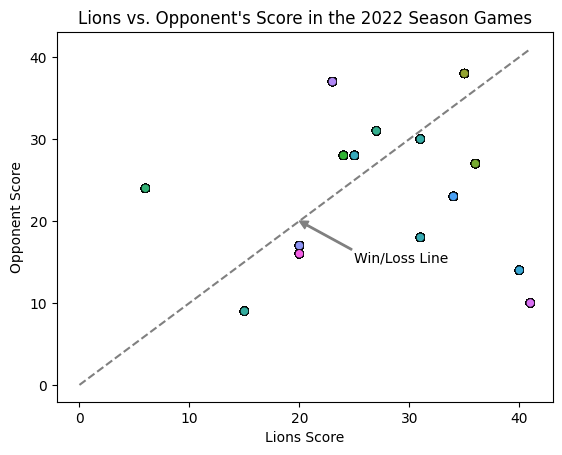

In [ ]:
# to show crime counts....need to make a few changes

graph2022 = sns.scatterplot(data = nfl2022_dpd, x = "Lions Score", y= "Opponent Score", hue="Date of Incident", \
                            linewidth=0.5, edgecolor="black", legend = False)

maxScore = max(nfl2022_dpd["Lions Score"].max(), nfl2022_dpd["Opponent Score"].max())
plt.plot([0, maxScore], [0, maxScore], "--", color="gray")

graph2022.set(title = "Lions vs. Opponent's Score in the 2022 Season Games")
plt.annotate(text="Win/Loss Line",
             xy=[20,20],
             xytext=[25,15],
             arrowprops = {"width": 1, "headwidth": 6, "headlength": 6, "color": "gray"})

plt.show

In [ ]:
#OLD CODE

# #mapping different crime code descriptions and adding them to a list

# robbery = []
# for x in grouped_crime["description"]:
#     if "robbery" in x.lower():
#         robbery.append(x)

# traffic_stop = []
# for x in grouped_crime["description"]:
#     if "traffic" in x.lower() or "stop" in x.lower():
#         traffic_stop.append(x)

# disturbance = []
# for x in grouped_crime["description"]:
#     if "disturbance" in x.lower():
#         disturbance.append(x)

# towing = []
# for x in grouped_crime["description"]:
#     if "towing" in x.lower():
#         towing.append(x)

# assault = []
# for x in grouped_crime["description"]:
#     if "assault" in x.lower():
#         assault.append(x)

# larceny = []
# for x in grouped_crime["description"]:
#     if "larceny" in x.lower():
#         larceny.append(x)

# shots_fired = []
# for x in grouped_crime["description"]:
#     if "shots" in x.lower() or "fired" in x.lower():
#         shots_fired.append(x)

# burglary = []
# for x in grouped_crime["description"]:
#     if "burglary" in x.lower():
#         burglary.append(x)

# malicious_dest = []
# for x in grouped_crime["description"]:
#     if "malicious" in x.lower() or "destruction" in x.lower():
#         malicious_dest.append(x)

# drug_od = []
# for x in grouped_crime["description"]:
#     if "drug" in x.lower() or "drugs" in x.lower():
#         drug_od.append(x)


# auto_injury = []
# for x in grouped_crime["description"]:
#     if "auto" in x.lower() and "injuries" in x.lower() or "inj" in x.lower().split():
#         auto_injury.append(x)

# weapon = []
# for x in grouped_crime["description"]:
#     if "weapon" in x.lower() and "person" in x.lower():
#         weapon.append(x)

# breaking_entering = []
# for x in grouped_crime["description"]:
#     if "breaking" in x.lower() and "entering" in x.lower():
#         breaking_entering.append(x)

# grouped_crime["description"].replace(robbery, "Robbery", inplace=True)
# grouped_crime["description"].replace(burglary, "Burglary", inplace=True)
# grouped_crime["description"].replace(malicious_dest, "Malicious Destruction", inplace=True)
# grouped_crime["description"].replace(drug_od, "Drug OD", inplace=True)
# grouped_crime["description"].replace(auto_injury, "Auto Injury", inplace=True)
# grouped_crime["description"].replace(weapon, "Person With Weapon", inplace=True)
# grouped_crime["description"].replace(breaking_entering, "Breaking and Entering", inplace=True)
# grouped_crime["description"].replace(shots_fired, "Shots Fired", inplace=True)
# grouped_crime["description"].replace(assault, "Assault", inplace=True)
# grouped_crime["description"].replace(disturbance, "Disturbance", inplace=True)
# grouped_crime["description"].replace(traffic_stop, "Traffic Stop", inplace=True)
# grouped_crime["description"].replace(larceny, "Larceny", inplace=True)
# grouped_crime["description"].replace(towing, "Towing", inplace=True)

# grouped_crime_date["description"].replace(robbery, "Robbery", inplace=True)
# grouped_crime_date["description"].replace(burglary, "Burglary", inplace=True)
# grouped_crime_date["description"].replace(malicious_dest, "Malicious Destruction", inplace=True)
# grouped_crime_date["description"].replace(drug_od, "Drug OD", inplace=True)
# grouped_crime_date["description"].replace(auto_injury, "Auto Injury", inplace=True)
# grouped_crime_date["description"].replace(weapon, "Person With Weapon", inplace=True)
# grouped_crime_date["description"].replace(breaking_entering, "Breaking and Entering", inplace=True)
# grouped_crime_date["description"].replace(shots_fired, "Shots Fired", inplace=True)
# grouped_crime_date["description"].replace(assault, "Assault", inplace=True)
# grouped_crime_date["description"].replace(disturbance, "Disturbance", inplace=True)
# grouped_crime_date["description"].replace(traffic_stop, "Traffic Stop", inplace=True)
# grouped_crime_date["description"].replace(larceny, "Larceny", inplace=True)
# grouped_crime_date["description"].replace(towing, "Towing", inplace=True)

# grouped_crimes = grouped_crimes[grouped_crimes["description"] \
#                         .isin(["Robbery","Burglary","Malicious Destruction",
#                                "Drug OD","Auto Injury", "Person With Weapon",
#                                "Breaking and Entering","Shots Fired","Assault",
#                                "Disturbance", "Traffic Stop","Larceny","Towing"])]


# grouped_crimes_date = grouped_crimes_date[grouped_crimes_date["description"] \
#                         .isin(["Robbery","Burglary","Malicious Destruction",
#                                "Drug OD","Auto Injury", "Person With Weapon",
#                                "Breaking and Entering","Shots Fired","Assault",
#                                "Disturbance", "Traffic Stop","Larceny","Towing"])]


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8635eb0e-a3c3-4e99-9fcf-11c1489044ab' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>